### Loan Prediction

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("C:\\Users\\Fariz\\Downloads\\loan_prediction.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

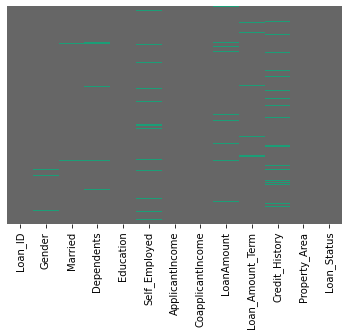

In [9]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [10]:
dataset.fillna(dataset['Gender'].mode()[0], inplace = True)

In [11]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

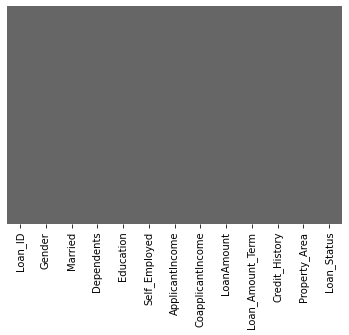

In [12]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [13]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
dataset=dataset[dataset['LoanAmount']!='Male']

In [15]:
dataset=dataset[dataset['Credit_History']!='Male']

In [17]:
dataset=dataset[dataset['Loan_Amount_Term']!='Male']

In [18]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [19]:
dataset.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
dataset=dataset.drop(['Loan_ID','Gender', 'Married', 'Dependents','LoanAmount'],axis=1)

In [21]:
dataset = pd.get_dummies(dataset, columns = ['Education','Self_Employed','Property_Area','Loan_Status'])


In [22]:
dataset.shape

(529, 14)

In [23]:
dataset.head(20)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_Male,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,1508.0,360.0,1.0,1,0,0,1,0,1,0,0,1,0
2,3000,0.0,360.0,1.0,1,0,0,0,1,0,0,1,0,1
3,2583,2358.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1
4,6000,0.0,360.0,1.0,1,0,0,1,0,0,0,1,0,1
5,5417,4196.0,360.0,1.0,1,0,0,0,1,0,0,1,0,1
6,2333,1516.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1
7,3036,2504.0,360.0,0.0,1,0,0,1,0,0,1,0,1,0
8,4006,1526.0,360.0,1.0,1,0,0,1,0,0,0,1,0,1
9,12841,10968.0,360.0,1.0,1,0,0,1,0,0,1,0,1,0
10,3200,700.0,360.0,1.0,1,0,0,1,0,0,0,1,0,1


In [24]:
X = dataset.iloc[:, 0:13]
y = dataset.iloc[:, -1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y)

In [26]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Voting

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [28]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

In [29]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);

In [31]:
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
model1.__class__.__name__

'LogisticRegression'

In [34]:
print(model1.__class__.__name__ , accuracy_score(y_test, model1_pred))
print(model2.__class__.__name__ , accuracy_score(y_test, model2_pred))
print(model3.__class__.__name__ , accuracy_score(y_test, model3_pred))

LogisticRegression 1.0
DecisionTreeClassifier 1.0
SVC 0.9811320754716981


### Bagging

In [35]:
from sklearn.ensemble import BaggingClassifier

In [36]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [39]:
bag = BaggingClassifier(base_estimator= svm,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 12,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 123)

In [40]:
X_train.shape

(370, 13)

In [41]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(probability=True), bootstrap_features=True,
                  max_features=12, max_samples=0.4, n_jobs=-1,
                  random_state=123)

In [42]:
bag_pred = bag.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, bag_pred)

0.9937106918238994

## Gradient Boosting Classifier


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbm = GradientBoostingClassifier(random_state = 123)

In [48]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [49]:
gbm_pred = gbm.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, gbm_pred)

1.0

## XGBoost Classifier


In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
import xgboost
print(xgboost.__version__)

1.7.0


In [55]:
from xgboost import XGBClassifier

In [56]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [57]:
xgbt.fit(X_train, y_train)

[14:41:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimarors" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimarors=10, n_estimators=100,
              n_jobs=0, num_class=2, num_parallel_tree=1, ...)

In [58]:
xgbt_pred = xgbt.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test, xgbt_pred)

1.0

In [61]:
xgbt.score(X_train, y_train)

1.0

In [62]:
xgbt.score(X_test, y_test)

1.0

# CatBoost

In [68]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [69]:
from catboost import CatBoostClassifier

In [72]:
X = dataset.iloc[:, 0:13]
y = dataset.iloc[:, -1]

In [74]:

model = CatBoostClassifier(iterations=2,
                          learning_rate=1,
                          depth=2)

model.fit(X_train, y_train)
preds = model.predict(X_test)

0:	learn: 0.1550152	total: 130ms	remaining: 130ms
1:	learn: 0.0639993	total: 132ms	remaining: 0us


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
model.score(X_train, y_train)

1.0

In [77]:
model.score(X_test, y_test)

1.0